In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils.vis_utils import plot_model


In [2]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)

In [3]:
Stock = pd.read_excel(r"C:\Users\Kamal Verma\Downloads\1729258-1613615-Stock_Price_data_set_(1).xlsx")
Stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000,267.900,250.030,254.260,254.260,11896100
1,2018-02-06,247.700,266.700,245.000,265.720,265.720,12595800
2,2018-02-07,266.580,272.450,264.330,264.560,264.560,8981500
3,2018-02-08,267.080,267.620,250.000,250.100,250.100,9306700
4,2018-02-09,253.850,255.800,236.110,249.470,249.470,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970,427.700,398.200,427.140,427.140,20047500
1005,2022-02-01,432.960,458.480,425.540,457.130,457.130,22542300
1006,2022-02-02,448.250,451.980,426.480,429.480,429.480,14346000
1007,2022-02-03,421.440,429.260,404.280,405.600,405.600,9905200


In [4]:
Stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

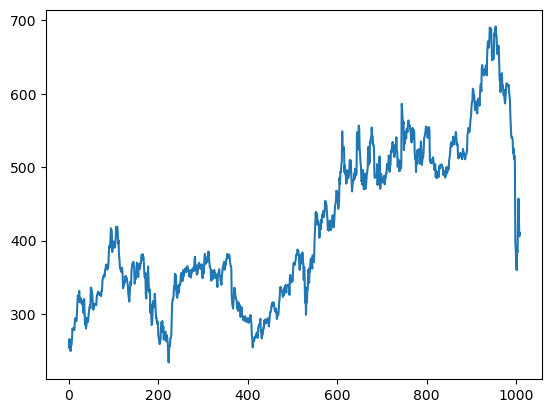

In [5]:
Stock['Adj Close'].plot()

In [6]:
output_var = pd.DataFrame(Stock['Adj Close'])
features = ['Open','High','Low','Volume']

In [7]:
#Scaling
scaler = MinMaxScaler()
feature_transfrom =  scaler.fit_transform(Stock[features])
feature_transform = pd.DataFrame(columns=features, data = feature_transfrom, index = Stock.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.061,0.038,0.041,0.186
1,0.030,0.036,0.030,0.198
2,0.071,0.048,0.073,0.136
3,0.072,0.038,0.041,0.141
4,0.043,0.011,0.011,0.273


In [8]:
#Splitting to Training set and Test se
timesplit = TimeSeriesSplit(n_splits=5)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [9]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [10]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
106/106 [==============================] - 1s 1ms/step - loss: 158716.0469
Epoch 2/100
106/106 [==============================] - 0s 902us/step - loss: 158082.4688
Epoch 3/100
106/106 [==============================] - 0s 908us/step - loss: 156663.7500
Epoch 4/100
106/106 [==============================] - 0s 898us/step - loss: 154145.9844
Epoch 5/100
106/106 [==============================] - 0s 893us/step - loss: 150398.3750
Epoch 6/100
106/106 [==============================] - 0s 927us/step - loss: 145379.3906
Epoch 7/100
106/106 [==============================] - 0s 916us/step - loss: 139291.3594
Epoch 8/100
106/106 [==============================] - 0s 908us/step - loss: 132400.5156
Epoch 9/100
106/106 [==============================] - 0s 918us/step - loss: 124935.7812
Epoch 10/100
106/106 [==============================] - 0s 908us/step - loss: 117082.1328
Epoch 11/100
106/106 [==============================] - 0s 891us/step - loss: 108990.4688
Epoch 12/100
106/106 

In [12]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

6/6 [==============================] - 0s 1ms/step


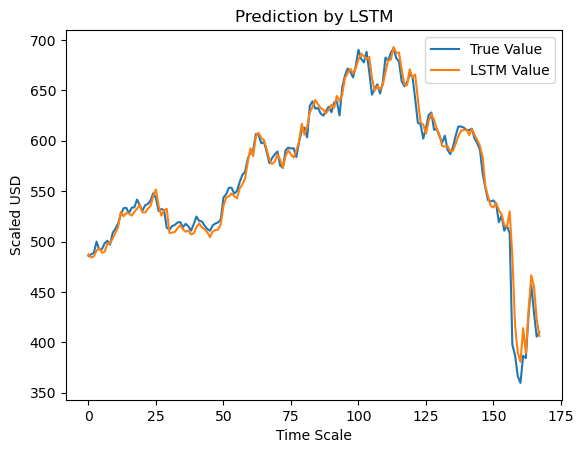

In [13]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [14]:
# Get the dates corresponding to the test set
test_dates = Stock.iloc[test_index].index

In [16]:
# Create a new DataFrame with the predictions and the corresponding dates
pred_df = pd.DataFrame({'Adj Close': y_test, 'Predicted': y_pred[:,0]})

# Export the DataFrame to a CSV file
pred_df.to_csv('predicted_stock_prices.csv', index=False)